<a href="https://colab.research.google.com/github/Sahaswari/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install scikit-learn -q
!pip install tensorflow -q
!pip install opendatasets -q

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import time

import opendatasets as od
%matplotlib inline
plt.style.use('ggplot')

In [3]:
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahaswarisamoda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:01<00:00, 63.1MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (224,224)

In [5]:
train_data_dir = "/content/brain-tumor-classification-mri/Training"
test_data_dir = "/content/brain-tumor-classification-mri/Testing"

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size = IMAGE_SIZE,
    subset='training',
    validation_split=0.1,
    seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size = IMAGE_SIZE,
    subset='validation',
    validation_split=0.1,
    seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=BATCH_SIZE,
    image_size = IMAGE_SIZE)

Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Found 2870 files belonging to 4 classes.
Using 287 files for validation.
Found 394 files belonging to 4 classes.


In [7]:
types = train_data.class_names
types

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [8]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 224, 224, 3)
(32,)


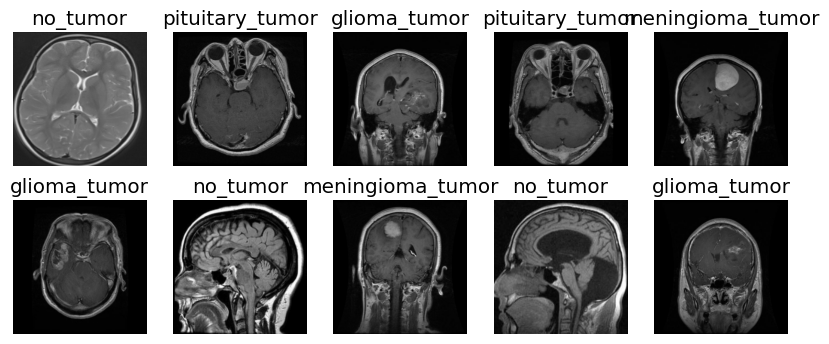

In [9]:
#plot data
plt.figure(figsize=(10,4))
for image, label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(types[label[i]])
    plt.axis('off')

In [10]:
#data visulaization
for image, label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [11]:
#Data Prepositing
#Data Normalization
train_data = train_data.map(lambda x, y:(x/255,y))
validation_data = validation_data.map(lambda x, y:(x/255,y))
test_data = test_data.map(lambda x, y:(x/255,y))

In [12]:
for image, label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00410162 0.00410162 0.00410162]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [13]:
#Data augmentation
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(224,224,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

In [15]:
#build model Architecture
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))

model.add(tf.keras.layers.Dense(4,activation = 'softmax'))


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)      

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [19]:
start_time = time.time()
history = model.fit(train_data,
                    epochs = 20,
                    validation_data = validation_data)
end_time = time.time()
print(end_time - start_time)

Epoch 1/20
81/81 [==============================] - 341s 4s/step - loss: 1.1906 - accuracy: 0.5106 - val_loss: 1.3075 - val_accuracy: 0.3240
Epoch 2/20
81/81 [==============================] - 397s 5s/step - loss: 0.9707 - accuracy: 0.5854 - val_loss: 1.2597 - val_accuracy: 0.3206
Epoch 3/20
81/81 [==============================] - 337s 4s/step - loss: 0.8669 - accuracy: 0.6318 - val_loss: 1.2587 - val_accuracy: 0.3484
Epoch 4/20
81/81 [==============================] - 355s 4s/step - loss: 0.7970 - accuracy: 0.6554 - val_loss: 0.9480 - val_accuracy: 0.7073
Epoch 5/20
81/81 [==============================] - 341s 4s/step - loss: 0.7424 - accuracy: 0.6732 - val_loss: 1.0542 - val_accuracy: 0.5436
Epoch 6/20
81/81 [==============================] - 389s 5s/step - loss: 0.6787 - accuracy: 0.7023 - val_loss: 0.8308 - val_accuracy: 0.6446
Epoch 7/20
81/81 [==============================] - 376s 5s/step - loss: 0.6562 - accuracy: 0.7201 - val_loss: 0.6112 - val_accuracy: 0.7596
Epoch 8/20
81

In [21]:
history.history

{'loss': [1.1905986070632935,
  0.9706774353981018,
  0.8669475317001343,
  0.7969782948493958,
  0.7424224615097046,
  0.678747832775116,
  0.6561885476112366,
  0.6218476295471191,
  0.6067598462104797,
  0.5818618535995483,
  0.5482053160667419,
  0.54482501745224,
  0.48916783928871155,
  0.5029837489128113,
  0.5016812086105347,
  0.4626500904560089,
  0.44325360655784607,
  0.43038153648376465,
  0.4137375056743622,
  0.4422719478607178],
 'accuracy': [0.5106465220451355,
  0.5853658318519592,
  0.6318234801292419,
  0.6554394364356995,
  0.6732481718063354,
  0.7022841572761536,
  0.7200928926467896,
  0.736740231513977,
  0.7317073345184326,
  0.7549360990524292,
  0.7696477174758911,
  0.7657762169837952,
  0.8013937473297119,
  0.7982965707778931,
  0.8006194233894348,
  0.8141695857048035,
  0.815330982208252,
  0.8246225118637085,
  0.8284940123558044,
  0.816105306148529],
 'val_loss': [1.3074872493743896,
  1.2596536874771118,
  1.2586995363235474,
  0.948004424571991,
  

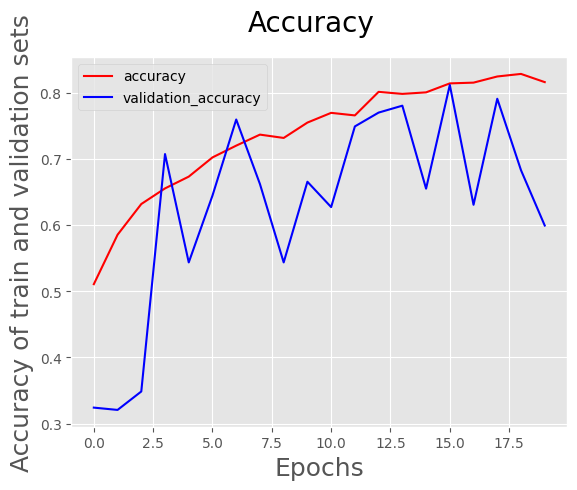

In [20]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'red', label='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label='validation_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.xlabel('Epochs', fontsize = 18)
plt.ylabel('Accuracy of train and validation sets', fontsize = 18)
plt.legend()
plt.show()

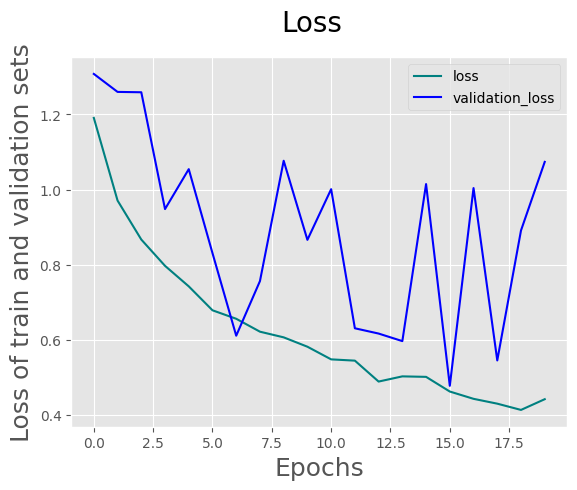

In [22]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label='loss')
plt.plot(history.history['val_loss'], color = 'blue', label='validation_loss')
fig.suptitle('Loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 18)
plt.ylabel('Loss of train and validation sets', fontsize = 18)
plt.legend()
plt.show()

In [25]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.Accuracy()

In [27]:
#Check process for the Test data
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  yhat = np.argmax(yhat, axis=1) # Convert predicted probabilities to class indices
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 333ms/step


In [28]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.76719576>

In [29]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9863946>

In [30]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.38071066>

In [31]:
import cv2

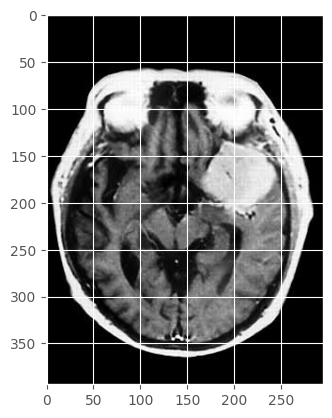

In [32]:
image = cv2.imread('/content/brain-tumor-classification-mri/Testing/meningioma_tumor/image(107).jpg')
plt.imshow(image)
plt.show()

In [33]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [34]:
scaled_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [35]:
np.expand_dims(scaled_image, axis=0).shape

(1, 224, 224, 3)

In [36]:
y_hat = model.predict(np.expand_dims(scaled_image, axis=0))

1/1 [==============================] - 0s 80ms/step


In [37]:
y_hat

array([[1.5504901e-11, 1.9796252e-01, 8.0203199e-01, 5.5816590e-06]],
      dtype=float32)

In [38]:
types

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']